<a href="https://colab.research.google.com/github/3B032013/2025_ML_hws/blob/main/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 實作fashion_mnist數據庫

## 一、資料預處理

In [ ]:
from tensorflow.keras import utils   # tf 2.0
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(10)

In [ ]:
from keras.datasets import fashion_mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= fashion_mnist.load_data()

In [ ]:
x_Train = x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [ ]:
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [ ]:
y_Train_OneHot = utils.to_categorical(y_train_label)
y_Test_OneHot = utils.to_categorical(y_test_label)

In [ ]:
# 資料類別標籤
labels_name = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

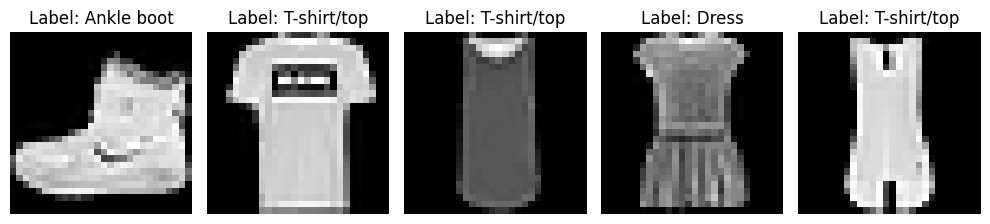

In [ ]:
# 顯示三張訓練圖片和對應的 label 名稱
plt.figure(figsize=(10, 3))
for i in range(0,5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train_image[i], cmap='gray')
    plt.title(f"Label: {labels_name[y_train_label[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## 二、建立神經網路

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
model = Sequential()

In [ ]:
# 將「輸入層」與「隱藏層1」加入模型

In [ ]:
model.add(Dense(units=128,
        input_dim=784,
        kernel_initializer='normal',
        activation='relu'))
model.add(Dropout(0.1))

In [ ]:
# 隱藏層2

In [ ]:
model.add(Dense(units=64,
        kernel_initializer='normal',
        activation='relu'))
model.add(Dropout(0.5))

In [ ]:
# 輸出層

In [ ]:
model.add(Dense(units=10,
        kernel_initializer='normal',
        activation='softmax'))

In [ ]:
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

None


## 三、訓練神經網路模型

*   損失函數使用crosse ntropy
*   優化器(optimizer)使用adam，較SGD(梯度下降)快速收斂損失誤差

In [ ]:
from keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',
       optimizer='adam', metrics=['accuracy'])


## 驗證(validation)用資料

*   從訓練資料當中切出20%作為驗證(validation)用資料
*   全部訓練資料60000筆資料(服飾圖片)當中，12000筆當作驗證資料，故真正訓練資料只剩48000筆。



## 批次大小(batch_size)


*   每一訓練回合(epoch)，設定每一批次輸入200筆資料(服飾圖片)，所以，每一epoch，有48000/200=280批次。
*   每一批次輸入200筆資料(服飾圖片)，所以：神經網路輸入資料的形狀為(200, 784)
*   第一隱藏層輸出資料的形狀為(200, 128)，第二隱藏層輸出資料的形狀為(200, 64)，輸出層輸出資料的形狀為(200, 10)。







In [ ]:
train_history =model.fit(x=x_Train_normalize,
             y=y_Train_OneHot,validation_split=0.2,
             epochs=30, batch_size=200, verbose=2)

Epoch 1/30
240/240 - 3s - 14ms/step - accuracy: 0.6731 - loss: 0.9034 - val_accuracy: 0.8149 - val_loss: 0.5166
Epoch 2/30
240/240 - 1s - 3ms/step - accuracy: 0.8124 - loss: 0.5442 - val_accuracy: 0.8443 - val_loss: 0.4290
Epoch 3/30
240/240 - 1s - 5ms/step - accuracy: 0.8360 - loss: 0.4749 - val_accuracy: 0.8553 - val_loss: 0.3981
Epoch 4/30
240/240 - 2s - 7ms/step - accuracy: 0.8470 - loss: 0.4358 - val_accuracy: 0.8628 - val_loss: 0.3845
Epoch 5/30
240/240 - 1s - 4ms/step - accuracy: 0.8574 - loss: 0.4106 - val_accuracy: 0.8704 - val_loss: 0.3612
Epoch 6/30
240/240 - 1s - 5ms/step - accuracy: 0.8634 - loss: 0.3919 - val_accuracy: 0.8694 - val_loss: 0.3575
Epoch 7/30
240/240 - 1s - 5ms/step - accuracy: 0.8696 - loss: 0.3743 - val_accuracy: 0.8712 - val_loss: 0.3506
Epoch 8/30
240/240 - 1s - 5ms/step - accuracy: 0.8734 - loss: 0.3635 - val_accuracy: 0.8790 - val_loss: 0.3362
Epoch 9/30
240/240 - 1s - 3ms/step - accuracy: 0.8792 - loss: 0.3477 - val_accuracy: 0.8795 - val_loss: 0.3358


## 四、以圖型顯示準確率(accuracy)與損失(loss)


*   每一epoch的每一批次訓練後，都會計算神經網路的訓練後的損失(誤差)與準確率，並進行神經網路的參數調整，以降低損失(誤差)：
  *   利用梯度下降法計算神經網路參數的調整量
  *   利用倒傳遞方式進行參數大小調整
*   
每一epoch訓練後，計算神經網路所有批次的平均準確率(accuracy)與平均損失(loss)，如上。
*   每一epoch訓練後，用驗證資料驗證神經網路的準確率(val_accuracy)與損失(val_loss)，如上。







## 以圖形顯示訓練過程

In [ ]:
# 畫出訓練過程每一個epoch訓練資料與驗證資料各自準確率(accuracy)的變化，或者損失誤差(loss)的變化
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

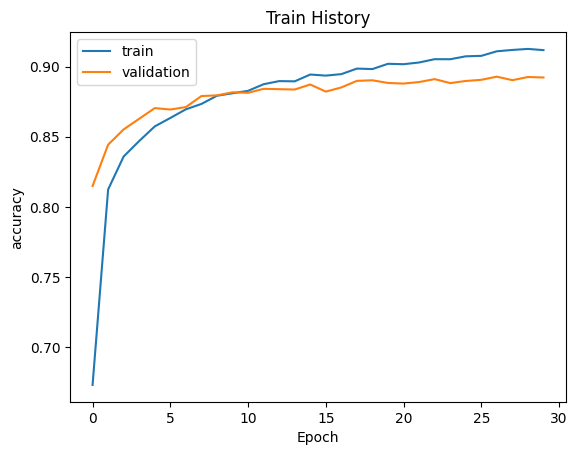

In [ ]:
# 準確率accuracy
show_train_history(train_history,'accuracy','val_accuracy')

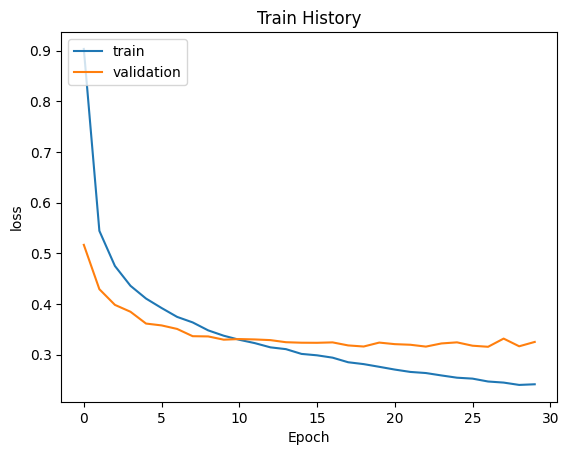

In [ ]:
# 損失誤差loss
show_train_history(train_history,'loss','val_loss')

## 五、評估模型準確率

In [ ]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8850 - loss: 0.3556

accuracy= 0.8862000107765198


## 六、進行預測

In [ ]:
# 一次呈現數張測試資料(圖片)、預測結果與真實結果
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels_name[labels[idx]])+"\n"
        if len(prediction)>0:
            title+="predict="+str(labels_name[np.argmax(prediction[idx])])

        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


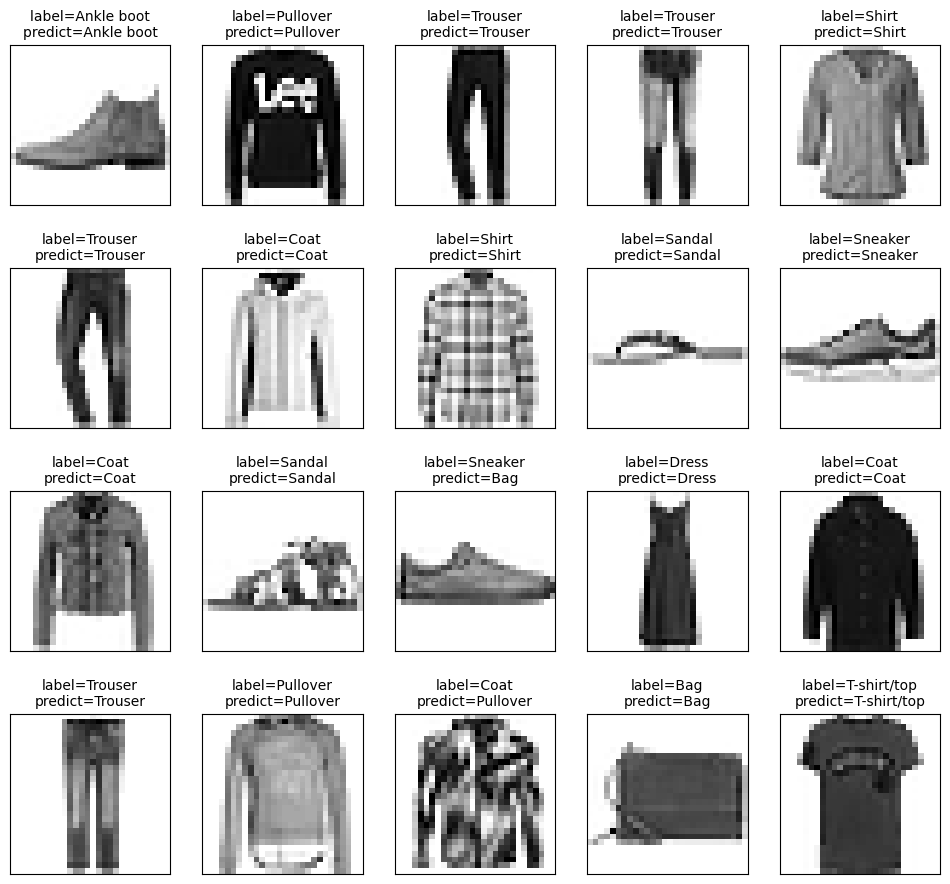

In [ ]:
prediction = model.predict(x_Test)
plot_images_labels_prediction(x_test_image,y_test_label,
               prediction,idx=0,num=20)

## 七、confusion matrix (混淆矩陣)



*   預測結果與真實結果相同或不同的情形



In [ ]:
import pandas as pd
# 將10000個預測結果一一轉換為
predicted_labels = np.argmax(prediction, axis=1)

# Now use predicted_labels in crosstab
pd.crosstab(y_test_label, predicted_labels, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,869,8,31,12,16,1,50,0,13,0
1,0,977,2,14,6,0,0,0,1,0
2,13,4,688,4,223,0,68,0,0,0
3,27,38,11,779,118,0,19,0,8,0
4,0,0,37,6,917,0,38,0,2,0
5,0,0,0,0,1,939,0,29,3,28
6,162,4,64,12,128,0,615,0,15,0
7,0,0,0,0,0,12,0,958,1,29
8,4,1,4,0,12,3,1,2,973,0


## 八、儲存模型

In [ ]:
#儲存 model
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/My Drive/Colab Notebooks'

model.save('hw3.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks
